In [3]:
# Dataset: creditcard.csv
# location: https://mitu.co.in/dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('creditcard.csv')

In [7]:
df.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
x = df.drop(['Time', 'Class'], axis = 1)
y = df['Class']

In [11]:
import warnings
warnings.filterwarnings('ignore')

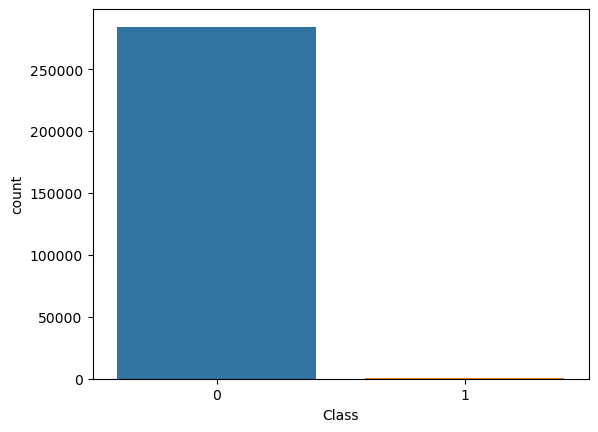

In [12]:
sns.countplot(x = y);

In [14]:
y.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [ ]:
# pip install imbalanced-learn

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size=0.25,
                                                   random_state= 0)

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
dt = DecisionTreeClassifier()

In [19]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [20]:
y_pred = dt.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9991713715906857

## Under Sampling

In [22]:
from imblearn.under_sampling import RandomUnderSampler

In [24]:
rus = RandomUnderSampler(random_state=0)

In [26]:
x_rus, y_rus = rus.fit_resample(x, y)

In [27]:
y_rus.value_counts()

Class
0    492
1    492
Name: count, dtype: int64

## Over Sampling

In [28]:
from imblearn.over_sampling import RandomOverSampler

In [29]:
ros = RandomOverSampler(random_state=0)

In [30]:
x_ros, y_ros = ros.fit_resample(x,y)

In [31]:
y_ros.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

## SMOTE

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
sm = SMOTE(random_state= 0)

In [34]:
x_sm, y_sm = sm.fit_resample(x, y)

In [35]:
y_sm.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm,
                                                   test_size=0.25,
                                                   random_state= 0)

In [37]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [38]:
y_pred = dt.predict(x_test)

In [39]:
accuracy_score(y_test, y_pred)

0.9983187720705131